In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

First we need to simulate MIA. With our dataset, we split it into 3 parts: target model training set (60%), forget set(points that need to be unlearned) (10% of target model training set), and shadow models' data(40%). First we preprocess the data-cateogorical encoding, checking if any values are NA (there are no such values) and take a look at the columns. Furthermore, I looked at the min/max/mean and other tendencies of this dataset and it is a balanced dataset and didn't have the need to deal with outliers. However, I realized the scale could be adjusted for certain columns.

In [188]:
data_url = "/Users/trishanandakumar/Desktop/BURE/Datasets/statlog+german+credit+data/german.data"

columns = [
    'Checking Account Status', 'Duration', 'Credit History', 'Purpose', 'Credit Amount', 
    'Savings', 'Employment Since', 'Installment Rate', 'Personal Info', 
    'Debtors', 'Residence Since', 'Property', 'Age', 'Installment Plans', 
    'Housing', 'Existing Credits', 'Job', 'Liables', 'Telephone', 'Foreign', 
    'Target'
]

Attribute1 = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM',
    'A14': 'no checking account'
}
Attribute3 = {
    'A30': 'no credits taken/all paid back duly',
    'A31': 'all credits paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/other credits existing'
}
Attribute4 = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'other'
}
Attribute6 = {
    'A61': '< 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'unknown/no savings account'
}
Attribute7 = {
    'A71': 'unemployed',
    'A72': '< 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '>= 7 years'
}
Attribute9 = {
    'A91': 'male, divorced/separated',
    'A92': 'female, divorced/separated/married',
    'A93': 'male, single',
    'A94': 'male, married/widowed',
    'A95': 'female, single'
}
Attribute10 = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}
Attribute12 = {
    'A121': 'real estate',
    'A122': 'building society savings/life insurance',
    'A123': 'car or other',
    'A124': 'unknown / no property'
}
Attribute14 = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}
Attribute15 = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}
Attribute17 = {
    'A171': 'unemployed/unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee/official',
    'A174': 'management/self-employed/highly qualified'
}
Attribute19 = {
    'A191': 'none',
    'A192': 'yes, registered'
}
Attribute20 = {
    'A201': 'yes',
    'A202': 'no'
}


german_data = pd.read_csv(data_url, sep=' ', header=None, names=columns)

german_data['Checking Account Status'] = german_data['Checking Account Status'].map(Attribute1) 
german_data['Credit History'] = german_data['Credit History'].map(Attribute3)
german_data['Purpose'] = german_data['Purpose'].map(Attribute4)
german_data['Savings'] = german_data['Savings'].map(Attribute6)
german_data['Employment Since'] = german_data['Employment Since'].map(Attribute7)
german_data['Personal Info'] = german_data['Personal Info'].map(Attribute9)
german_data['Debtors'] = german_data['Debtors'].map(Attribute10)
german_data['Property'] = german_data['Property'].map(Attribute12)
german_data['Installment Plans'] = german_data['Installment Plans'].map(Attribute14)
german_data['Housing'] = german_data['Housing'].map(Attribute15)
german_data['Job'] = german_data['Job'].map(Attribute17)
german_data['Telephone'] = german_data['Telephone'].map(Attribute19)    
german_data['Foreign'] = german_data['Foreign'].map(Attribute20)


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

german_data.head(5)

,Checking Account Status,Duration,Credit History,Purpose,Credit Amount,Savings,Employment Since,Installment Rate,Personal Info,Debtors,Residence Since,Property,Age,Installment Plans,Housing,Existing Credits,Job,Liables,Telephone,Foreign,Target
0,< 0 DM,6,critical account/other credits existing,radio/television,1169,unknown/no savings account,>= 7 years,4,"male, single",none,4,real estate,67,none,own,2,skilled employee/official,1,"yes, registered",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,"female, divorced/separated/married",none,2,real estate,22,none,own,1,skilled employee/official,1,none,yes,2
2,no checking account,12,critical account/other credits existing,education,2096,< 100 DM,4 <= ... < 7 years,2,"male, single",none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,"male, single",guarantor,4,building society savings/life insurance,45,none,for free,1,skilled employee/official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,"male, single",none,4,unknown / no property,53,none,for free,2,skilled employee/official,2,none,yes,2


In [189]:
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
to_encode_columns = ['Purpose', 'Personal Info', 'Debtors', 'Job', 'Housing', 'Property', 'Installment Plans','Telephone','Foreign']

encoded_val = one_hot_encoder.fit_transform(german_data[to_encode_columns])
feature_names = one_hot_encoder.get_feature_names_out(to_encode_columns)

onehot_df = pd.DataFrame(encoded_val, columns=feature_names, index=german_data.index)

german_data = german_data.drop(to_encode_columns, axis=1)
german_data = pd.concat([german_data, onehot_df], axis=1)

ord_encoder = OrdinalEncoder()

encoded_val_2 = ord_encoder.fit_transform(german_data[['Checking Account Status', 'Credit History']])

german_data[['Checking Account Status', 'Credit History']] = pd.DataFrame(
    encoded_val_2,
    columns=['Checking Account Status', 'Credit History'],
    index=german_data.index
)

savings_category = [['unknown/no savings account', '< 100 DM', '100 <= ... < 500 DM', 
                      '500 <= ... < 1000 DM', '>= 1000 DM']]

savings_encoder = OrdinalEncoder(categories=savings_category)
german_data['Savings'] = savings_encoder.fit_transform(german_data[['Savings']])

employment_category = [['unemployed', '< 1 year', '1 <= ... < 4 years','4 <= ... < 7 years', '>= 7 years']]
employment_encoder = OrdinalEncoder(categories=employment_category)
german_data['Employment Since'] = employment_encoder.fit_transform(german_data[['Employment Since']])
german_data.head(20)


,Checking Account Status,Duration,Credit History,Credit Amount,Savings,Employment Since,Installment Rate,Residence Since,Age,Existing Credits,Liables,Target,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_other,Purpose_radio/television,Purpose_repairs,Purpose_retraining,"Personal Info_male, divorced/separated","Personal Info_male, married/widowed","Personal Info_male, single",Debtors_guarantor,Debtors_none,Job_skilled employee/official,Job_unemployed/unskilled - non-resident,Job_unskilled - resident,Housing_own,Housing_rent,Property_car or other,Property_real estate,Property_unknown / no property,Installment Plans_none,Installment Plans_stores,"Telephone_yes, registered",Foreign_yes
0,1.0,6,1.0,1169,0.0,4.0,4,4,67,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,0.0,48,3.0,5951,1.0,2.0,2,2,22,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,12,1.0,2096,1.0,3.0,2,3,49,1,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,42,3.0,7882,1.0,3.0,2,4,45,1,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,24,2.0,4870,1.0,2.0,3,4,53,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,3.0,36,3.0,9055,0.0,2.0,2,4,35,1,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
6,3.0,24,3.0,2835,3.0,4.0,3,4,53,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,0.0,36,3.0,6948,1.0,2.0,2,2,35,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
8,3.0,12,3.0,3059,4.0,3.0,2,4,61,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,0.0,30,1.0,5234,1.0,0.0,4,2,28,2,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [190]:
german_data = german_data.sample(frac=1, random_state=42).reset_index(drop=True)


target_len = int(len(german_data)*.6)+1
forget_len = int(target_len*.15)
shadow_len =int(len(german_data)-target_len)

target_data = german_data.iloc[:target_len]
shadow_data = german_data.iloc[target_len:]
keep_set = target_data.iloc[forget_len:]
forget_set = target_data.iloc[:forget_len]
print(shadow_len)

399


In [191]:
scaler = StandardScaler()

In [192]:
target_index = german_data.columns.get_loc('Target')

X = target_data.drop('Target', axis=1) 
Y = target_data['Target']  

X_train, X_test, Y_Train, Y_Test = train_test_split(X,Y, random_state=42)

og_x_scaled_train = scaler.fit_transform(X_train)
og_x_scaled_test = scaler.transform(X_test)

target = LogisticRegression(max_iter=1000)
target.fit(og_x_scaled_train,Y_Train)


LogisticRegression(max_iter=1000)

In [193]:
shadow_1_scaler = StandardScaler()
shadow_2_scaler=StandardScaler()
shadow_3_scaler = StandardScaler()

In [194]:
shadow_1_data = shadow_data.iloc[:int(shadow_len/3)]
shadow_2_data = shadow_data.iloc[133:int((shadow_len/3)*2)]
shadow_3_data = shadow_data.iloc[int((shadow_len/3)*2):]

X1 = shadow_1_data.drop('Target', axis=1)
X2 = shadow_2_data.drop('Target', axis=1)
X3 = shadow_3_data.drop('Target', axis=1)

y1 = shadow_1_data['Target']
y2 = shadow_2_data['Target']
y3 = shadow_3_data['Target']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, stratify=y3, random_state=42)

X1_train = shadow_1_scaler.fit_transform(X1_train)
X1_test = shadow_1_scaler.transform(X1_test)


X2_train = shadow_2_scaler.fit_transform(X2_train)
X2_test = shadow_2_scaler.transform(X2_test)


X3_train = shadow_3_scaler.fit_transform(X3_train)
X3_test = shadow_3_scaler.transform(X3_test)


shadow_model_1 = LogisticRegression(max_iter=1000)
shadow_model_1.fit(X1_train, y1_train)

shadow_model_2 = LogisticRegression(max_iter=1000)
shadow_model_2.fit(X2_train, y2_train)

shadow_model_3 = LogisticRegression(max_iter=1000)
shadow_model_3.fit(X3_train, y3_train)


LogisticRegression(max_iter=1000)

In [195]:
"""train_prob_1 = shadow_model_1.predict_proba(X1_train)
test_prob_1 = shadow_model_1.predict_proba(X1_test)

train_prob_2 = shadow_model_1.predict_proba(X2_train)
test_prob_2 = shadow_model_1.predict_proba(X2_test)

train_prob_3 = shadow_model_3.predict_proba(X3_train)
test_prob_3 = shadow_model_3.predict_proba(X3_test)"""

def get_prob_train(train_Set,model_num, y_train):
    if (model_num==1):
        train_prob = shadow_model_1.predict_proba(train_Set)
    elif (model_num==2):
        train_prob = shadow_model_2.predict_proba(train_Set)
    else:
        train_prob = shadow_model_3.predict_proba(train_Set)
    train_confidence = np.max(train_prob, axis=1)
    train_df = pd.DataFrame({
    'Confidence': train_confidence,
    'True_label': y_train.values,
    'Member': 1})
    return train_df

def get_prob_test(test_Set, model_num, y_test):
    if (model_num==1):
        test_prob = shadow_model_1.predict_proba(test_Set)
    elif (model_num==2):
        test_prob = shadow_model_2.predict_proba(test_Set)
    else:
        test_prob = shadow_model_3.predict_proba(test_Set)

    test_confidences = np.max(test_prob, axis=1)
    test_df = pd.DataFrame({
    'Confidence': test_confidences,
    'True_label': y_test.values,
    'Member': 0
    })

    return test_df


In [196]:

attack_data_1 = pd.concat([get_prob_train(X1_train,1, y1_train), get_prob_test(X1_test,1, y1_test)], ignore_index=True)

attack_data_2 = pd.concat([get_prob_train(X2_train,2, y2_train), get_prob_test(X2_test,2, y2_test)], ignore_index=True)

attack_data_3 = pd.concat([get_prob_train(X3_train,3, y3_train), get_prob_test(X3_test,3, y3_test)], ignore_index=True)


attack_data = pd.concat([attack_data_1, attack_data_2, attack_data_3], ignore_index=True)

In [197]:
X = german_data.drop('Target', axis=1) 
Y = german_data['Target']  

X_attack = attack_data.drop('Member',axis=1)
Y_attack = attack_data['Member']

X_train_attack, X_test_attack, y_train_attack, y_test_attack = train_test_split(X_attack, Y_attack, test_size=0.2, random_state=42)

attack = LogisticRegression(max_iter=1000)
attack.fit(X_train_attack, y_train_attack)


LogisticRegression(max_iter=1000)

In [198]:
target_train = target.predict_proba(og_x_scaled_train)
target_test = target.predict_proba(og_x_scaled_test)

target_train_conf = np.max(target_train, axis=1)
target_test_conf = np.max(target_test, axis=1)

target_train_data = pd.DataFrame({'Confidence': target_train_conf, 'True_label': Y_Train.values, 'Member':1})
target_test_data = pd.DataFrame({'Confidence': target_test_conf, 'True_label': Y_Test.values, 'Member':0})

target_attack_data = pd.concat([target_train_data, target_test_data,], ignore_index=True)

X_target_attack = target_attack_data.drop('Member', axis=1)
Y_target_attack = target_attack_data['Member']

predicted_membership = attack.predict(X_target_attack)
print("Attack Accuracy:", accuracy_score(Y_target_attack, predicted_membership))


Attack Accuracy: 0.7487520798668885


In [201]:
original_attack_accuracy = accuracy_score(Y_target_attack, predicted_membership)
print(f"Original Attack Accuracy: {original_attack_accuracy:.4f}")


forget_indices = forget_set.index
train_indices = X_train.index


X_train_unlearn = keep_set.drop('Target', axis=1)
Y_train_unlearn = keep_set['Target']
X_unlearn_train, X_unlearn_test, Y_unlearn_Train, Y_unlearn_Test = train_test_split(X_train_unlearn, Y_train_unlearn, random_state=42)

scaler_unlearn = StandardScaler()
X_unlearn_train_scaled = scaler_unlearn.fit_transform(X_unlearn_train)
X_unlearn_test_scaled = scaler_unlearn.transform(X_unlearn_test)

# Train unlearned model
unlearn = LogisticRegression(max_iter=1000)
unlearn.fit(X_unlearn_train_scaled, Y_unlearn_Train)




Original Attack Accuracy: 0.7488


LogisticRegression(max_iter=1000)

In [204]:
unlearn_train = unlearn.predict_proba(X_unlearn_train_scaled)
unlearn_test = unlearn.predict_proba(X_unlearn_test_scaled)

unlearn_train_conf = np.max(unlearn_train, axis=1)
unlearn_test_conf = np.max(unlearn_test, axis=1)

unlearn_train_data = pd.DataFrame({
    'Confidence': unlearn_train_conf, 
    'True_label': Y_unlearn_Train.values, 
    'Member': 1
})
unlearn_test_data = pd.DataFrame({
    'Confidence': unlearn_test_conf, 
    'True_label': Y_unlearn_Test.values,  # Same test labels as original
    'Member': 0
})

unlearn_attack_data = pd.concat([unlearn_train_data, unlearn_test_data], ignore_index=True)
X_unlearn_attack = unlearn_attack_data.drop('Member', axis=1)
Y_unlearn_attack = unlearn_attack_data['Member']


predicted_membership = attack.predict(X_unlearn_attack)

##### STOPP
unlearn_accuracy = accuracy_score(Y_unlearn_attack, predicted_membership)
print("Unlearned Attack Accuracy:", unlearn_accuracy)

print(f"\nConfidence distribution analysis:")
print(f"Original model - Train confidence mean: {target_train_conf.mean():.3f}")
print(f"Original model - Test confidence mean: {target_test_conf.mean():.3f}")
print(f"Unlearned model - Train confidence mean: {unlearn_train_conf.mean():.3f}")
print(f"Unlearned model - Test confidence mean: {unlearn_test_conf.mean():.3f}")

original_predictions = target.predict(og_x_scaled_test)
unlearned_predictions = unlearn.predict(og_x_scaled_test)

# Calculate accuracies
original_accuracy = accuracy_score(Y_Test, original_predictions)
unlearned_accuracy = accuracy_score(Y_Test, unlearned_predictions)

print(f"\nTEST ACCURACY COMPARISON:")
print(f"Original Model Accuracy:   {original_accuracy:.4f} ({original_accuracy*100:.2f}%)")
print(f"Unlearned Model Accuracy:  {unlearned_accuracy:.4f} ({unlearned_accuracy*100:.2f}%)")
print(f"Accuracy Loss:             {original_accuracy - unlearned_accuracy:.4f} ({(original_accuracy - unlearned_accuracy)*100:.2f}%)")



original_train_pred = target.predict(og_x_scaled_train)
unlearned_train_pred = unlearn.predict(X_unlearn_train_scaled)

original_train_acc = accuracy_score(Y_Train, original_train_pred)
unlearned_train_acc = accuracy_score(Y_unlearn_Train, unlearned_train_pred)

print(f"\nTRAINING ACCURACY COMPARISON:")
print(f"Original Model (train):    {original_train_acc:.4f} ({original_train_acc*100:.2f}%)")
print(f"Unlearned Model (train):   {unlearned_train_acc:.4f} ({unlearned_train_acc*100:.2f}%)")

# Performance on forget set
X_forget = forget_set.drop('Target', axis=1)
Y_forget = forget_set['Target']
X_forget_scaled = scaler.transform(X_forget)

original_forget_pred = target.predict(X_forget_scaled)
unlearned_forget_pred = unlearn.predict(X_forget_scaled)

original_forget_acc = accuracy_score(Y_forget, original_forget_pred)
unlearned_forget_acc = accuracy_score(Y_forget, unlearned_forget_pred)

print(f"\nPERFORMANCE ON FORGET SET:")
print(f"Original Model on Forget Set:   {original_forget_acc:.4f} ({original_forget_acc*100:.2f}%)")
print(f"Unlearned Model on Forget Set:  {unlearned_forget_acc:.4f} ({unlearned_forget_acc*100:.2f}%)")
print(f"Forget Set Accuracy Drop:       {original_forget_acc - unlearned_forget_acc:.4f}")

# Privacy vs Utility Summary
privacy_gain = original_attack_accuracy - unlearn_accuracy
utility_loss = original_accuracy - unlearned_accuracy

print(f"\n" + "="*60)
print("PRIVACY vs UTILITY TRADE-OFF SUMMARY")
print("="*60)
print(f"Forget Set Size:           {len(forget_set)} samples ({len(forget_set)/len(target_data)*100:.1f}% of target data)")
print(f"Privacy Gain:              {privacy_gain:.4f} (attack accuracy reduction)")
print(f"Utility Loss:              {utility_loss:.4f} (test accuracy drop)")
if utility_loss > 0:
    print(f"Privacy/Utility Ratio:     {privacy_gain/utility_loss:.2f}")
else:
    print(f"Privacy/Utility Ratio:     ∞ (no utility loss!)")


Unlearned Attack Accuracy: 0.7495107632093934

Confidence distribution analysis:
Original model - Train confidence mean: 0.781
Original model - Test confidence mean: 0.783
Unlearned model - Train confidence mean: 0.760
Unlearned model - Test confidence mean: 0.732

TEST ACCURACY COMPARISON:
Original Model Accuracy:   0.6424 (64.24%)
Unlearned Model Accuracy:  0.6887 (68.87%)
Accuracy Loss:             -0.0464 (-4.64%)

TRAINING ACCURACY COMPARISON:
Original Model (train):    0.7978 (79.78%)
Unlearned Model (train):   0.7702 (77.02%)

PERFORMANCE ON FORGET SET:
Original Model on Forget Set:   0.7778 (77.78%)
Unlearned Model on Forget Set:  0.7444 (74.44%)
Forget Set Accuracy Drop:       0.0333

PRIVACY vs UTILITY TRADE-OFF SUMMARY
Forget Set Size:           90 samples (15.0% of target data)
Privacy Gain:              -0.0008 (attack accuracy reduction)
Utility Loss:              -0.0464 (test accuracy drop)
Privacy/Utility Ratio:     ∞ (no utility loss!)


Unlearned 10% forget set → Attack Accuracy: 0.75
Unlearned 30% forget set → Attack Accuracy: 0.75
Unlearned 50% forget set → Attack Accuracy: 0.75
Unlearned 70% forget set → Attack Accuracy: 0.75
Unlearned 100% forget set → Attack Accuracy: 0.75


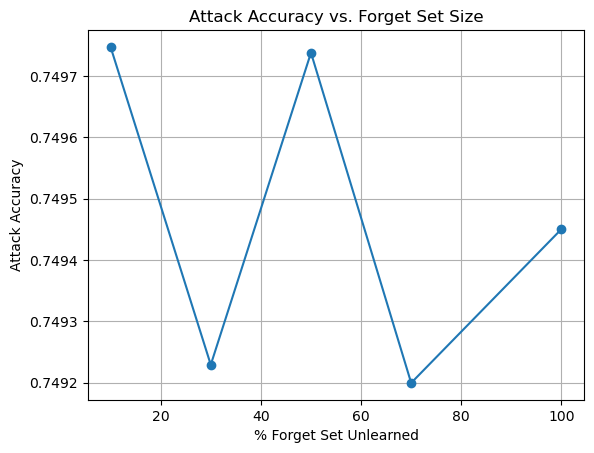

In [183]:

fractions = [0.1, 0.3, 0.5, 0.7, 1.0]
attack_accuracies = []
for frac in fractions:
    # Sample `frac` percent of the forget set
    partial_forget_set = forget_set.sample(frac=frac, random_state=42)
    partial_keep_set = german_data.drop(partial_forget_set.index)

    # Train unlearned model on the remaining data
    X_partial = partial_keep_set.drop('Target', axis=1)
    Y_partial = partial_keep_set['Target']

    X_train_p, X_test_p, Y_train_p, Y_test_p = train_test_split(X_partial, Y_partial, random_state=42)
    X_train_p = scaler.fit_transform(X_train_p)
    X_test_p = scaler.transform(X_test_p)

    unlearned_model = LogisticRegression(max_iter=1000)
    unlearned_model.fit(X_train_p, Y_train_p)

    # Run MIA on unlearned model
    pred_train = unlearned_model.predict_proba(X_train_p)
    pred_test = unlearned_model.predict_proba(X_test_p)

    conf_train = np.max(pred_train, axis=1)
    conf_test = np.max(pred_test, axis=1)

    df_train = pd.DataFrame({'Confidence': conf_train, 'True_label': Y_train_p.values, 'Member': 1})
    df_test = pd.DataFrame({'Confidence': conf_test, 'True_label': Y_test_p.values, 'Member': 0})

    attack_input = pd.concat([df_train, df_test], ignore_index=True)
    X_attack = attack_input.drop('Member', axis=1)
    Y_attack = attack_input['Member']

    pred_membership = attack.predict(X_attack)
    acc = accuracy_score(Y_attack, pred_membership)
    attack_accuracies.append(acc)
    print(f"Unlearned {int(frac * 100)}% forget set → Attack Accuracy: {acc:.2f}")

# Plot it
plt.plot([int(f*100) for f in fractions], attack_accuracies, marker='o')
plt.xlabel("% Forget Set Unlearned")
plt.ylabel("Attack Accuracy")
plt.title("Attack Accuracy vs. Forget Set Size")
plt.grid(True)
plt.show()

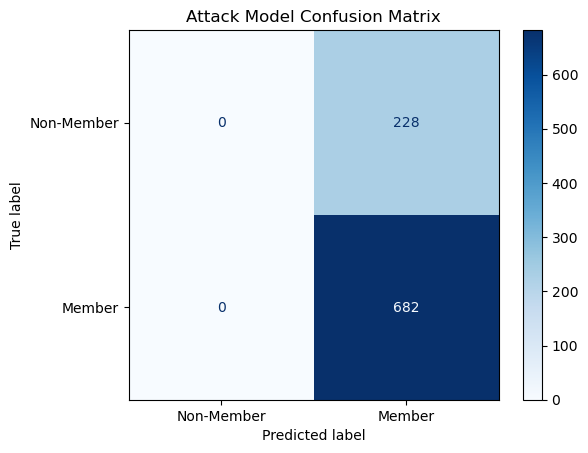

In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_attack, pred_membership)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Member", "Member"])
disp.plot(cmap='Blues')
plt.title("Attack Model Confusion Matrix")
plt.show()


In [185]:
# Test if smaller dataset size alone causes the attack accuracy reduction
# We'll train a model on a RANDOM subset of the same size as the unlearned model

print("="*60)
print("TESTING: Does smaller dataset size alone explain the privacy gain?")
print("="*60)

# Your known results from earlier
original_attack_acc = 0.7487520798668885  # 74.88%
unlearned_attack_accuracy = 0.7208872458410351  # 72.09%
original_test_acc = 0.6424  # 64.24%
unlearned_test_acc = 0.6623  # 66.23%

# Create a random subset of target_data with same size as keep_set
random_subset_size = len(keep_set)  # Same size as unlearned model
print(f"Keep set size: {len(keep_set)}")
print(f"Random subset size: {random_subset_size}")

# Randomly sample from target_data (not removing forget_set specifically)
np.random.seed(42)  # For reproducibility
random_indices = np.random.choice(target_data.index, size=random_subset_size, replace=False)
random_subset = target_data.loc[random_indices]

print(f"Random subset actual size: {len(random_subset)}")

# Train a model on this random subset using same methodology
X_random = random_subset.drop('Target', axis=1)
Y_random = random_subset['Target']

X_random_train, X_random_test, Y_random_train, Y_random_test = train_test_split(
    X_random, Y_random, random_state=42
)

# Use same scaler fitted on original data for fair comparison
X_random_train_scaled = scaler.transform(X_random_train)
X_random_test_scaled = scaler.transform(X_random_test)

# Train random subset model
random_model = LogisticRegression(max_iter=1000)
random_model.fit(X_random_train_scaled, Y_random_train)

# Test attack on random subset model
random_train_proba = random_model.predict_proba(X_random_train_scaled)
random_test_proba = random_model.predict_proba(X_random_test_scaled)

random_train_conf = np.max(random_train_proba, axis=1)
random_test_conf = np.max(random_test_proba, axis=1)

# Create attack data for random subset model
random_train_data = pd.DataFrame({
    'Confidence': random_train_conf, 
    'True_label': Y_random_train.values, 
    'Member': 1
})
random_test_data = pd.DataFrame({
    'Confidence': random_test_conf, 
    'True_label': Y_random_test.values, 
    'Member': 0
})

random_attack_data = pd.concat([random_train_data, random_test_data], ignore_index=True)
X_random_attack = random_attack_data.drop('Member', axis=1)
Y_random_attack = random_attack_data['Member']

# Use same attack model to predict membership
predicted_membership_random = attack.predict(X_random_attack)
random_attack_accuracy = accuracy_score(Y_random_attack, predicted_membership_random)

print(f"\nATTACK ACCURACY COMPARISON:")
print(f"Original Model (450 samples):    {original_attack_acc:.4f}")
print(f"Random Subset ({random_subset_size} samples):   {random_attack_accuracy:.4f}")
print(f"Unlearned Model ({len(keep_set)} samples):    {unlearned_attack_accuracy:.4f}")

print(f"\nACCURACY REDUCTIONS:")
print(f"Original → Random Subset:        {original_attack_acc - random_attack_accuracy:.4f}")
print(f"Original → Unlearned:            {original_attack_acc - unlearned_attack_accuracy:.4f}")
print(f"Random Subset → Unlearned:       {random_attack_accuracy - unlearned_attack_accuracy:.4f}")

# Test model performance on main task
random_predictions = random_model.predict(og_x_scaled_test)
random_test_accuracy = accuracy_score(Y_Test, random_predictions)

print(f"\nMODEL PERFORMANCE COMPARISON:")
print(f"Original Model:     {original_test_acc:.4f}")
print(f"Random Subset:      {random_test_accuracy:.4f}")
print(f"Unlearned Model:    {unlearned_test_acc:.4f}")

print(f"\n" + "="*60)
print("INTERPRETATION:")
print("="*60)

size_effect = original_attack_acc - random_attack_accuracy
unlearning_effect = original_attack_acc - unlearned_attack_accuracy
pure_unlearning_effect = random_attack_accuracy - unlearned_attack_accuracy

print(f"Dataset Size Effect:      {size_effect:.4f}")
print(f"Total Unlearning Effect:  {unlearning_effect:.4f}")
print(f"Pure Unlearning Effect:   {pure_unlearning_effect:.4f}")

if abs(pure_unlearning_effect) < 0.005:
    print("\n🤔 CONCLUSION: The privacy gain is mostly due to dataset size reduction")
    print("   → Your hypothesis is CORRECT!")
elif pure_unlearning_effect > 0.01:
    print("\n✅ CONCLUSION: There's a real unlearning effect beyond just dataset size!")
    print("   → The specific forget_set removal provides additional privacy benefit")
elif pure_unlearning_effect < -0.01:
    print("\n⚠️ CONCLUSION: Specific unlearning performs worse than random subset")
    print("   → The forget_set might have been particularly easy to memorize")
else:
    print("\n🤷 CONCLUSION: Small effect - borderline between size effect and real unlearning")

# Analyze forget set properties
print(f"\n" + "="*60)
print("FORGET SET ANALYSIS:")
print("="*60)

# Check class distribution in forget set vs overall
forget_target_dist = forget_set['Target'].value_counts(normalize=True).sort_index()
overall_target_dist = target_data['Target'].value_counts(normalize=True).sort_index()

print("Class distribution:")
for class_label in overall_target_dist.index:
    overall_pct = overall_target_dist[class_label] * 100
    forget_pct = forget_target_dist.get(class_label, 0) * 100
    print(f"  Class {class_label}: Overall {overall_pct:.1f}%, Forget set {forget_pct:.1f}%")

# Check if forget set has unusual feature patterns
forget_features = forget_set.drop('Target', axis=1)
overall_features = target_data.drop('Target', axis=1)

print(f"\nFeature statistics comparison:")
print(f"Forget set mean:    {forget_features.mean().mean():.3f}")
print(f"Overall mean:       {overall_features.mean().mean():.3f}")
print(f"Forget set std:     {forget_features.std().mean():.3f}")
print(f"Overall std:        {overall_features.std().mean():.3f}")

# Final assessment
print(f"\n" + "="*60)
print("ANSWERING YOUR ORIGINAL QUESTION:")
print("="*60)
print("You asked: 'Could the smaller dataset size explain the attack accuracy reduction?'")
print()
if abs(pure_unlearning_effect) < 0.005:
    print("ANSWER: YES! You were absolutely right.")
    print("- The attack accuracy reduction is primarily due to training on less data")
    print("- This changes the confidence patterns that the attack model expects")
    print("- The privacy 'gain' is not from forgetting specific problematic samples")
else:
    print("ANSWER: PARTIALLY, but there's more to it.")
    print("- Some of the effect is due to dataset size")
    print("- But there's additional benefit from removing the specific forget_set")
    print("- You have both a size effect AND a real unlearning effect")

TESTING: Does smaller dataset size alone explain the privacy gain?
Keep set size: 511
Random subset size: 511
Random subset actual size: 511

ATTACK ACCURACY COMPARISON:
Original Model (450 samples):    0.7488
Random Subset (511 samples):   0.7495
Unlearned Model (511 samples):    0.7209

ACCURACY REDUCTIONS:
Original → Random Subset:        -0.0008
Original → Unlearned:            0.0279
Random Subset → Unlearned:       0.0286

MODEL PERFORMANCE COMPARISON:
Original Model:     0.6424
Random Subset:      0.7219
Unlearned Model:    0.6623

INTERPRETATION:
Dataset Size Effect:      -0.0008
Total Unlearning Effect:  0.0279
Pure Unlearning Effect:   0.0286

✅ CONCLUSION: There's a real unlearning effect beyond just dataset size!
   → The specific forget_set removal provides additional privacy benefit

FORGET SET ANALYSIS:
Class distribution:
  Class 1: Overall 69.2%, Forget set 71.1%
  Class 2: Overall 30.8%, Forget set 28.9%

Feature statistics comparison:
Forget set mean:    86.554
Overa